In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('breadbasket.csv')

In [4]:
df.shape

(20507, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [6]:
#we need to change date_time object into date time format
df['date_time']=pd.to_datetime(df['date_time'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [9]:
#checking the null values
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [ ]:
#so there is no missing values in the dataset

In [ ]:
#explore the data
#univariate,bivariate,multivariate

In [10]:
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:00,afternoon,weekend
20503,9682,Tea,2017-09-04 14:32:00,afternoon,weekend
20504,9683,Coffee,2017-09-04 14:57:00,afternoon,weekend
20505,9683,Pastry,2017-09-04 14:57:00,afternoon,weekend


In [11]:
#how many transactions we have
len(np.unique(df['Transaction']))

9465

In [ ]:
#in total there are 9465 transactions in the entire dataset

In [12]:
df['Transaction'].value_counts()

6716    11
6279    11
6474    11
6412    11
6045    10
        ..
4495     1
4494     1
4492     1
4491     1
9684     1
Name: Transaction, Length: 9465, dtype: int64

In [ ]:
#feature engineering
#we can get some more useful information

In [16]:
df['year']=df['date_time'].dt.year
df['year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
20502    2017
20503    2017
20504    2017
20505    2017
20506    2017
Name: year, Length: 20507, dtype: int64

In [18]:
df['date']=df['date_time'].dt.date
df['time']=df['date_time'].dt.time
df['month']=df['date_time'].dt.month
df['day']=df['date_time'].dt.day
df['weekday']=df['date_time'].dt.weekday
df['hour']=df['date_time'].dt.hour
df['year']=df['date_time'].dt.year

In [19]:
#droping the date_time column
df.drop('date_time',axis=1,inplace=True)

In [20]:
df

,Transaction,Item,period_day,weekday_weekend,date,year,time,month,day,weekday,hour
0,1,Bread,morning,weekend,2016-10-30,2016,09:58:00,10,30,6,9
1,2,Scandinavian,morning,weekend,2016-10-30,2016,10:05:00,10,30,6,10
2,2,Scandinavian,morning,weekend,2016-10-30,2016,10:05:00,10,30,6,10
3,3,Hot chocolate,morning,weekend,2016-10-30,2016,10:07:00,10,30,6,10
4,3,Jam,morning,weekend,2016-10-30,2016,10:07:00,10,30,6,10
...,...,...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,afternoon,weekend,2017-09-04,2017,14:32:00,9,4,0,14
20503,9682,Tea,afternoon,weekend,2017-09-04,2017,14:32:00,9,4,0,14
20504,9683,Coffee,afternoon,weekend,2017-09-04,2017,14:57:00,9,4,0,14
20505,9683,Pastry,afternoon,weekend,2017-09-04,2017,14:57:00,9,4,0,14


In [21]:
df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'),inplace=True)

In [22]:
df['weekday'].replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'),inplace=True)

In [23]:
#as we already got some new columns with the information of each day, so we are going to drop the column of 'weekday_weekend'
df.drop('weekday_weekend',axis=1,inplace=True)

In [24]:
df['hour'].replace((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),('1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'),inplace=True)

In [26]:
df['hour'].value_counts()

11-12    3102
12-13    2854
10-11    2666
14-15    2640
13-14    2617
15-16    2115
9-10     1966
16-17    1343
8-9       645
17-18     368
18-19      82
19-20      48
7-8        24
20-21      22
22-23       8
21-22       3
23-24       3
1-2         1
Name: hour, dtype: int64

In [28]:
df['Item']=df['Item'].str.strip()
df['Item']

0                Bread
1         Scandinavian
2         Scandinavian
3        Hot chocolate
4                  Jam
             ...      
20502           Coffee
20503              Tea
20504           Coffee
20505           Pastry
20506        Smoothies
Name: Item, Length: 20507, dtype: object

In [29]:
df['Item']=df['Item'].str.lower()
df['Item']

0                bread
1         scandinavian
2         scandinavian
3        hot chocolate
4                  jam
             ...      
20502           coffee
20503              tea
20504           coffee
20505           pastry
20506        smoothies
Name: Item, Length: 20507, dtype: object

In [ ]:
#EDA
#Univariate

In [30]:
len(np.unique(df['Transaction']))

9465

In [ ]:
#there are 9465 unique transactions we have

In [31]:
len(np.unique(df['Item']))

94

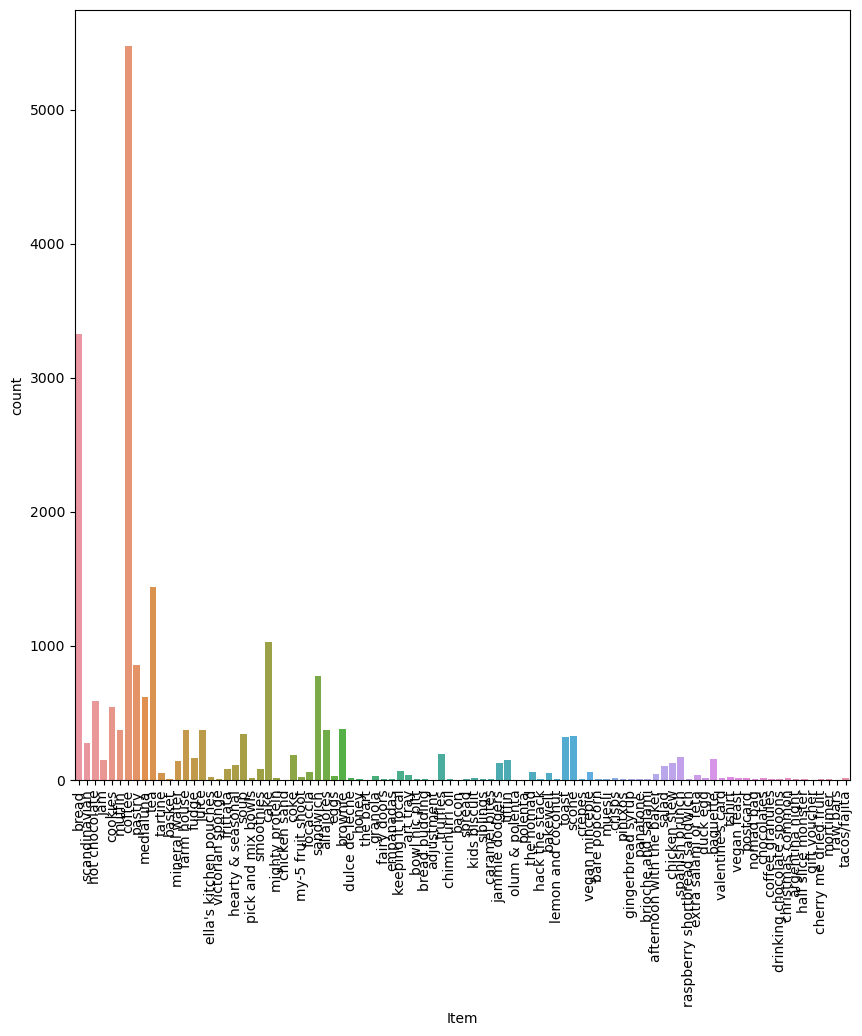

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['Item'])
plt.xticks(rotation=90)
plt.show()

In [33]:
#details of first 20 items which are mostly getting sold
data_item=df['Item'].value_counts()[0:20]
data_item

coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
alfajores         369
juice             369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
coke              185
Name: Item, dtype: int64

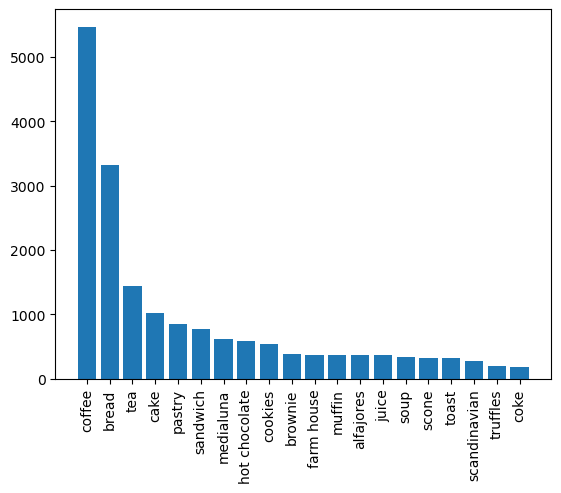

In [34]:
plt.bar(data_item.index,data_item.values)
plt.xticks(rotation=90)
plt.show()

In [36]:
df['period_day'].value_counts()

afternoon    11569
morning       8404
evening        520
night           14
Name: period_day, dtype: int64

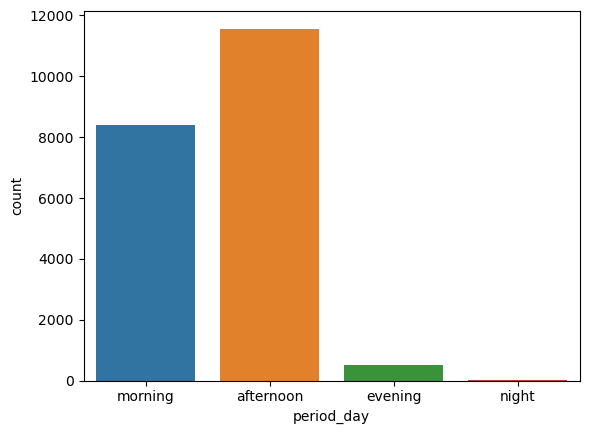

In [37]:
#so, the most number of transactions are happening in the afternoon
sns.countplot(x=df['period_day'])
plt.show()

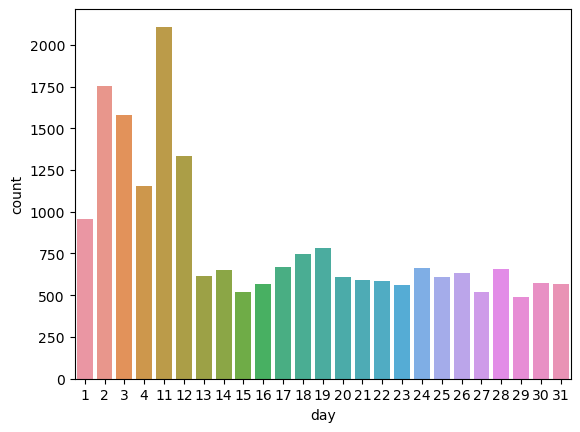

In [38]:
sns.countplot(x=df['day'])
plt.show()

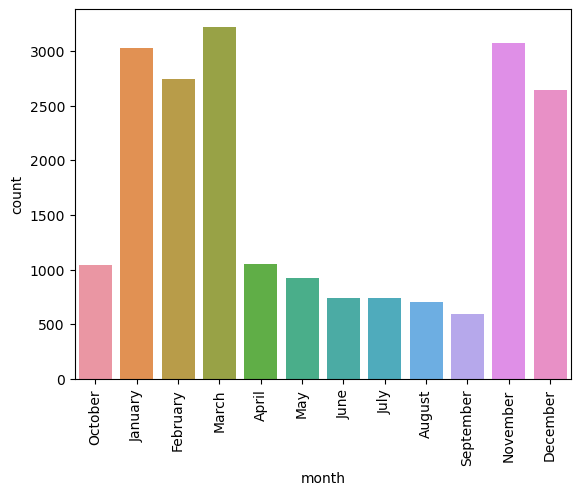

In [39]:
sns.countplot(x=df['month'])
plt.xticks(rotation=90)
plt.show()

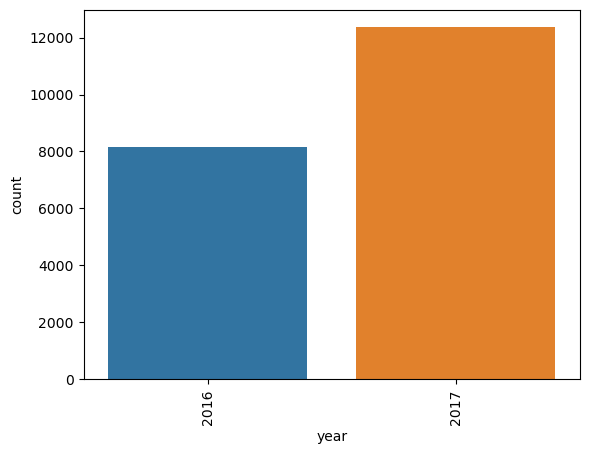

In [40]:
sns.countplot(x=df['year'])
plt.xticks(rotation=90)
plt.show()

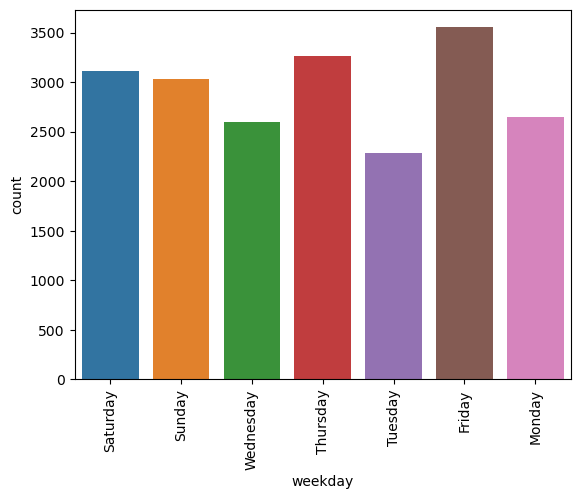

In [41]:
sns.countplot(x=df['weekday'])
plt.xticks(rotation=90)
plt.show()

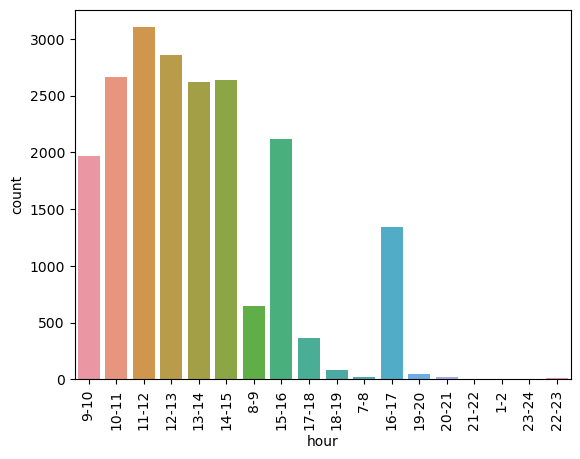

In [42]:
sns.countplot(x=df['hour'])
plt.xticks(rotation=90)
plt.show()

In [43]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 3.2 MB/s eta 0:00:01
   - -------------------------------------- 0.1/1.4 MB 3.2 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.4 MB 657.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 438.1 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.4 MB 438.1 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 437.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 361.0 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 387.0 kB/s eta 0:00:04
   --- --------------------------

In [44]:
from mlxtend.frequent_patterns import apriori,association_rules

In [45]:
final_data=df.groupby(['Transaction','Item'])['Item'].count().reset_index(name='count')
final_data

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [46]:
data_final=final_data.pivot_table(index='Transaction',columns='Item',values='count').fillna(0.0)
data_final

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
def change(a):
    if a==0.0:
        return 0
    else:
        return 1
data_final_new=data_final.applymap(change)

In [48]:
frequent_items=apriori(data_final_new,min_support=0.05,use_colnames=True)
frequent_items

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.327205,(bread)
1,0.103856,(cake)
2,0.478394,(coffee)
3,0.054411,(cookies)
4,0.058320,(hot chocolate)
5,0.061807,(medialuna)
6,0.086107,(pastry)
7,0.071844,(sandwich)
8,0.142631,(tea)
9,0.090016,"(bread, coffee)"


In [50]:
#association rules need to be formed
association_rules(frequent_items,metric='confidence',min_threshold=0.01,support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bread),(coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
1,(coffee),(bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
2,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
